# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv("co2.csv")
df

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
df.shape

(7385, 12)

In [5]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

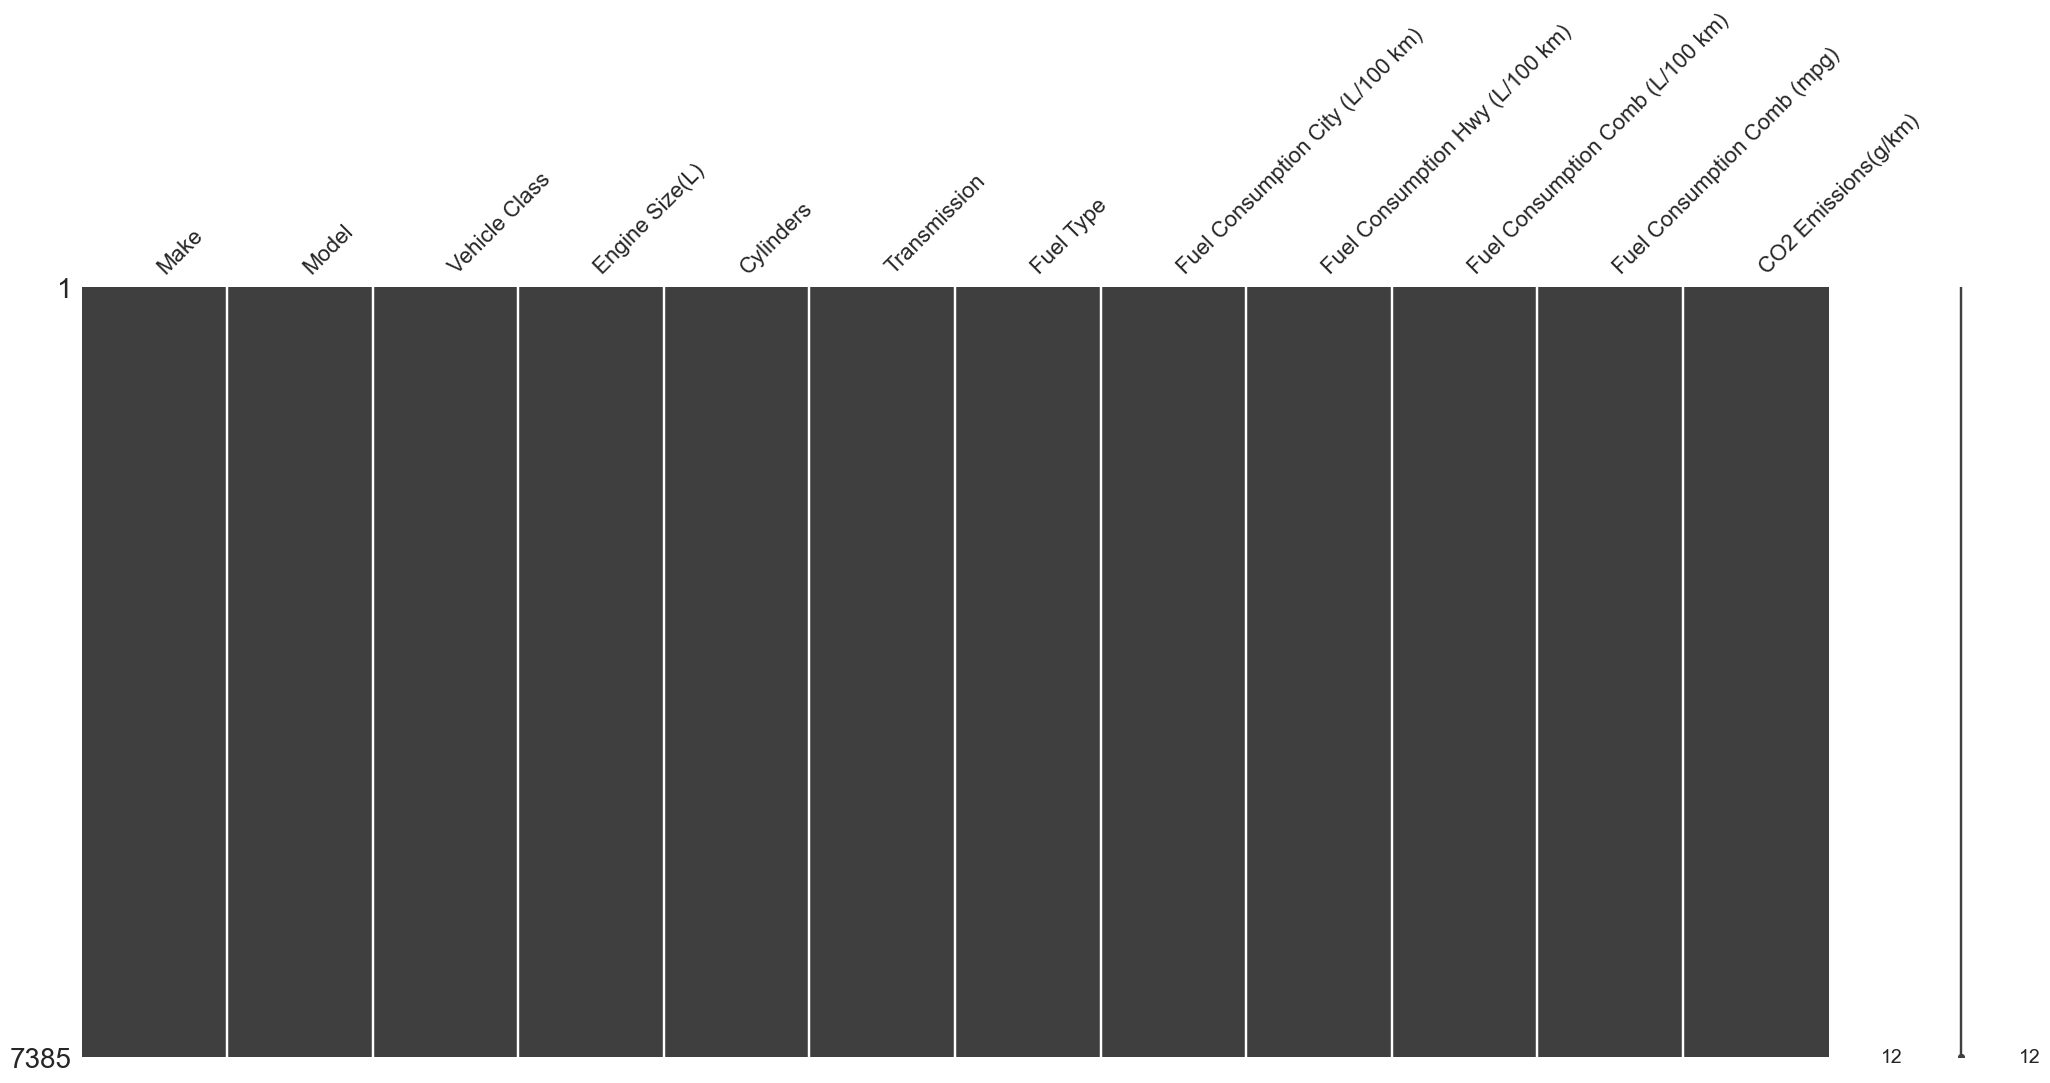

In [6]:
msno.matrix(df);

In [9]:
df.sort_values(by = 'CO2 Emissions(g/km)', ascending = False).head(10)

Make               Model    Vehicle Class  Engine Size(L)  \
5575        BUGATTI              Chiron       TWO-SEATER             8.0   
6640        BUGATTI              Chiron       TWO-SEATER             8.0   
4509        BUGATTI              CHIRON       TWO-SEATER             8.0   
7059    LAMBORGHINI  Aventador Roadster       TWO-SEATER             6.5   
6046    LAMBORGHINI  Aventador Roadster       TWO-SEATER             6.5   
349            FORD          E350 WAGON  VAN - PASSENGER             6.8   
6045    LAMBORGHINI     Aventador Coupe       TWO-SEATER             6.5   
7058    LAMBORGHINI     Aventador Coupe       TWO-SEATER             6.5   
2971  MERCEDES-BENZ            AMG G 65   SUV - STANDARD             6.0   
5126  MERCEDES-BENZ            AMG G 65   SUV - STANDARD             6.0   

      Cylinders Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
5575         16          AM7         Z                              26.8   
6640         16          AM7         Z                              26.8   
4509         16          AM7         Z                              26.8   
7059         12          AM7         Z                              26.6   
6046         12          AM7         Z                              26.6   
349          10           A5         X                              23.9   
6045         12          AM7         Z                              26.3   
7058         12          AM7         Z                              26.2   
2971         12          AS7         Z                              24.3   
5126         12           A7         Z                              22.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
5575                             16.6                              22.2   
6640                             16.6                              22.2   
4509                             16.6                              22.2   
7059                             15.8                              21.7   
6046                             15.8                              21.7   
349                              17.8                              21.2   
6045                             15.6                              21.5   
7058                             15.5                              21.4   
2971                             17.9                              21.4   
5126                             18.0                              20.3   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
5575                           13                  522  
6640                           13                  522  
4509                           13                  522  
7059                           13                  493  
6046                           13                  493  
349                            13                  488  
6045                           13                  487  
7058                           13                  485  
2971                           13                  476  
5126                           14                  473

In [10]:
df.describe().T

count        mean        std   min    25%  \
Engine Size(L)                    7385.0    3.160068   1.354170   0.9    2.0   
Cylinders                         7385.0    5.615030   1.828307   3.0    4.0   
Fuel Consumption City (L/100 km)  7385.0   12.556534   3.500274   4.2   10.1   
Fuel Consumption Hwy (L/100 km)   7385.0    9.041706   2.224456   4.0    7.5   
Fuel Consumption Comb (L/100 km)  7385.0   10.975071   2.892506   4.1    8.9   
Fuel Consumption Comb (mpg)       7385.0   27.481652   7.231879  11.0   22.0   
CO2 Emissions(g/km)               7385.0  250.584699  58.512679  96.0  208.0   

                                    50%    75%    max  
Engine Size(L)                      3.0    3.7    8.4  
Cylinders                           6.0    6.0   16.0  
Fuel Consumption City (L/100 km)   12.1   14.6   30.6  
Fuel Consumption Hwy (L/100 km)     8.7   10.2   20.6  
Fuel Consumption Comb (L/100 km)   10.6   12.6   26.1  
Fuel Consumption Comb (mpg)        27.0   32.0   69.0  
CO2 Emissions(g/km)               246.0  288.0  522.0

In [13]:
df = df[["Engine Size(L)", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", "CO2 Emissions(g/km)"]]
df.head()

Engine Size(L)  Fuel Consumption City (L/100 km)  \
0             2.0                               9.9   
1             2.4                              11.2   
2             1.5                               6.0   
3             3.5                              12.7   
4             3.5                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   CO2 Emissions(g/km)  
0                  196  
1                  221  
2                  136  
3                  255  
4                  244

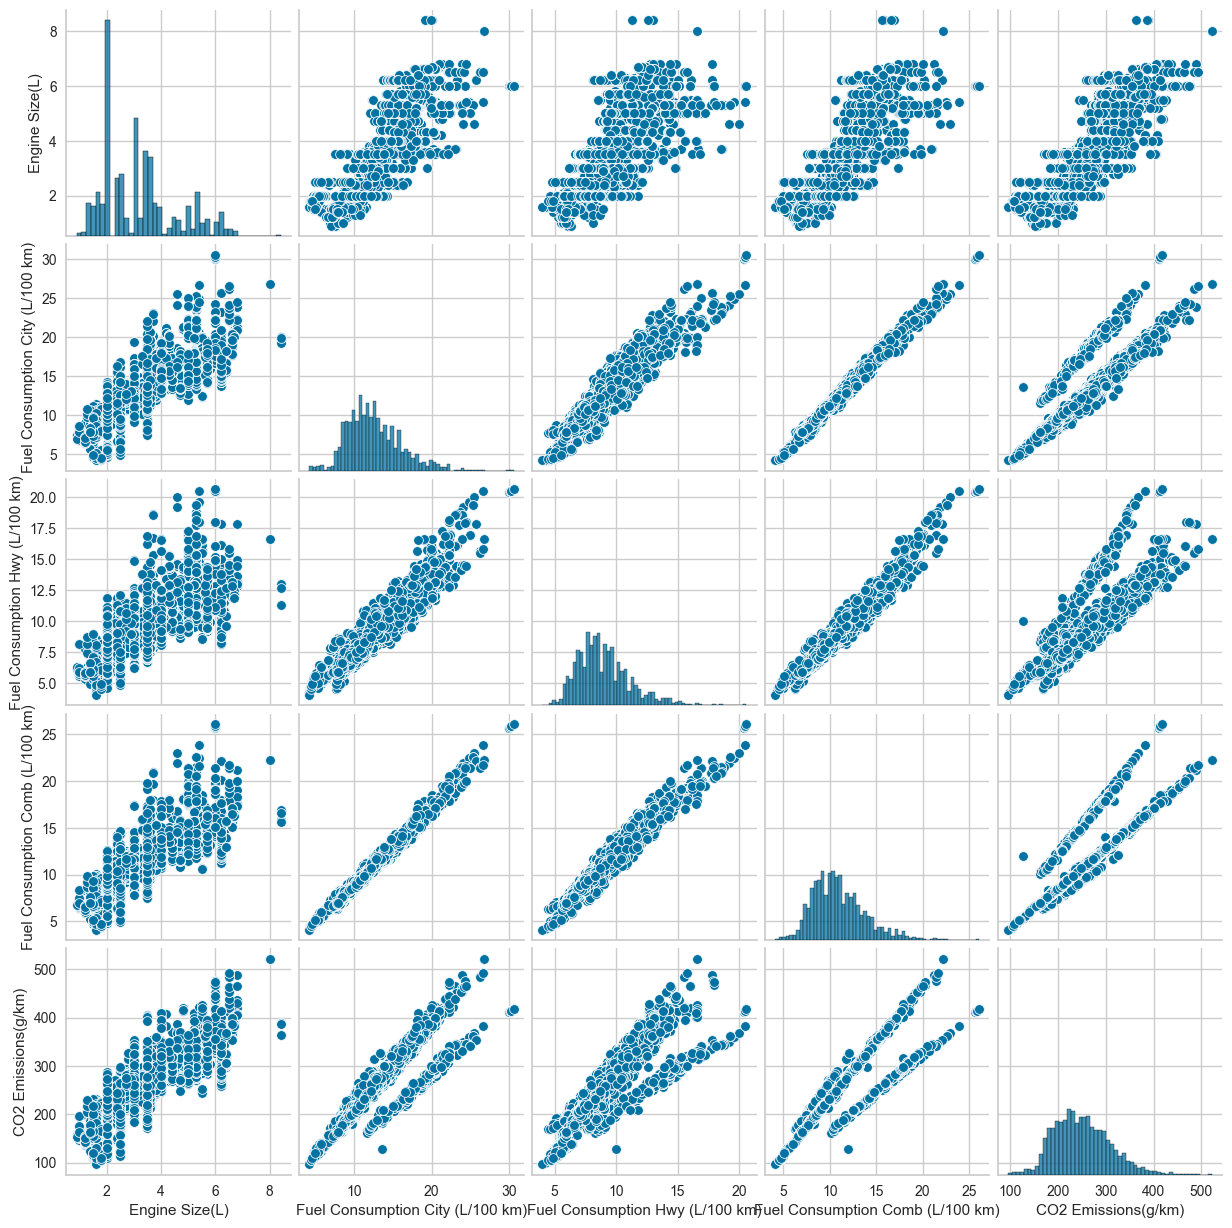

In [14]:
sns.pairplot(data = df);

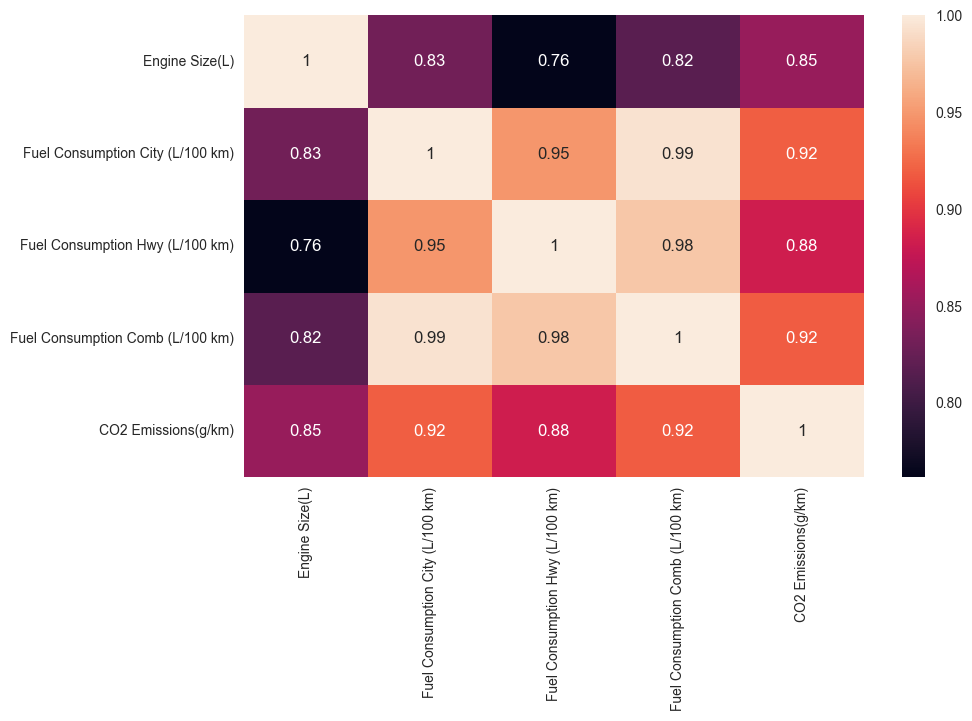

In [15]:
sns.heatmap(df.corr(), annot= True);

In [16]:
for i in df.drop(columns = "CO2 Emissions(g/km)" ).columns:
    print(i, skew(df[i]))

Engine Size(L) 0.8090166237091084
Fuel Consumption City (L/100 km) 0.8088403827811873
Fuel Consumption Hwy (L/100 km) 1.078997475325438
Fuel Consumption Comb (L/100 km) 0.8931342662031229


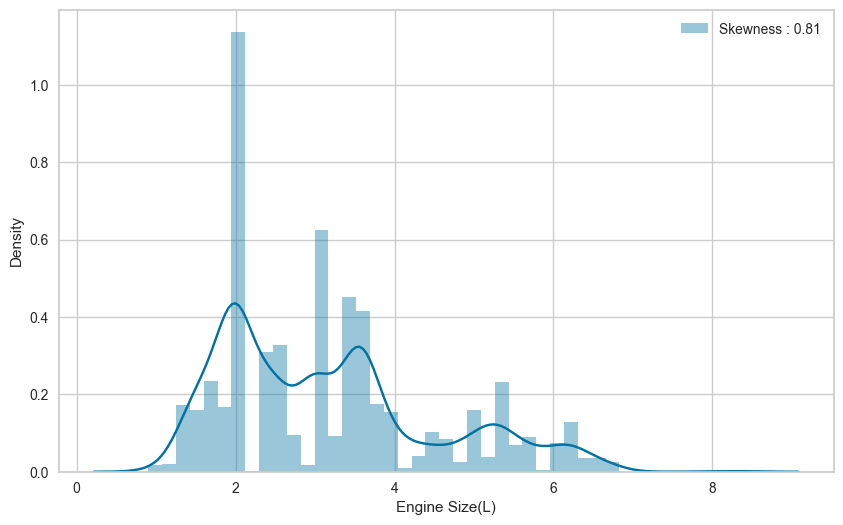

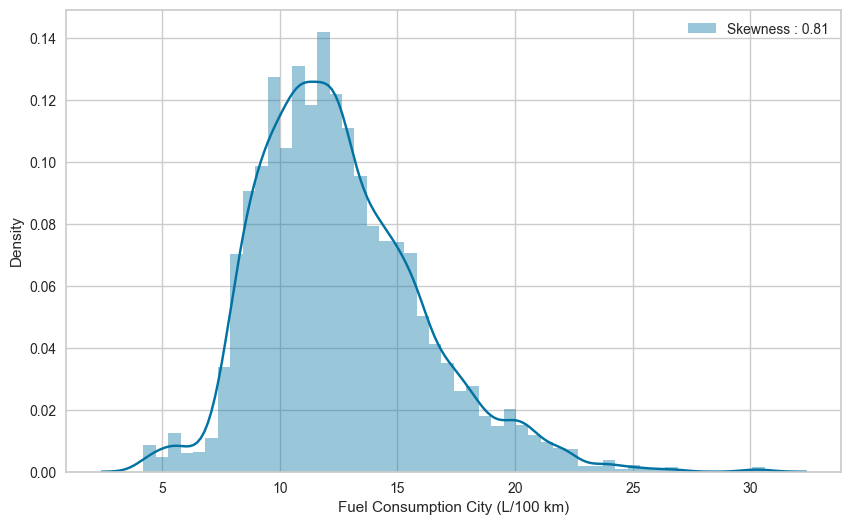

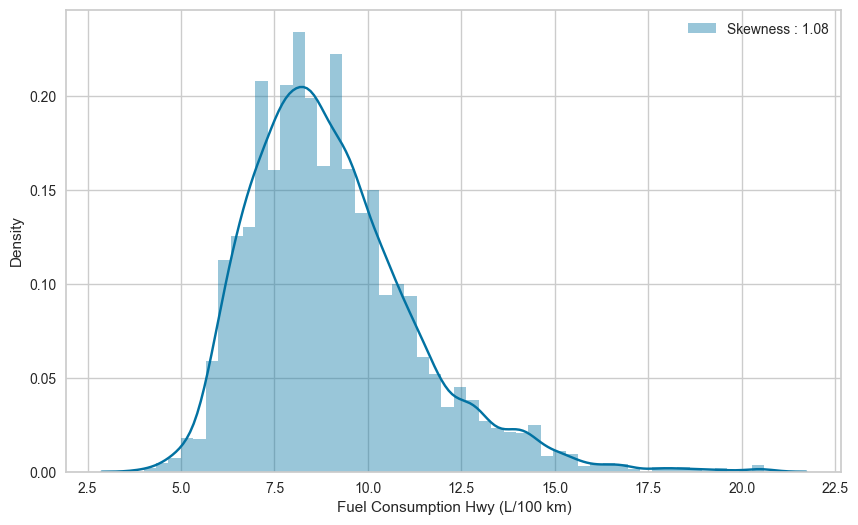

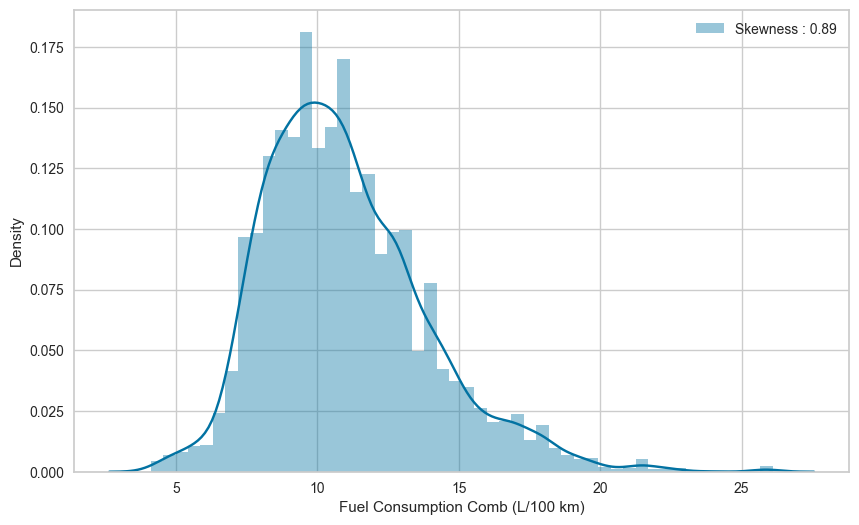

In [17]:
for j in df.drop(columns = "CO2 Emissions(g/km)").columns:
    g = sns.distplot(df[j], color = "b", label = "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc = "best")
    plt.show()

In [18]:
df.corr()

Engine Size(L)  \
Engine Size(L)                          1.000000   
Fuel Consumption City (L/100 km)        0.831379   
Fuel Consumption Hwy (L/100 km)         0.761526   
Fuel Consumption Comb (L/100 km)        0.817060   
CO2 Emissions(g/km)                     0.851145   

                                  Fuel Consumption City (L/100 km)  \
Engine Size(L)                                            0.831379   
Fuel Consumption City (L/100 km)                          1.000000   
Fuel Consumption Hwy (L/100 km)                           0.948180   
Fuel Consumption Comb (L/100 km)                          0.993810   
CO2 Emissions(g/km)                                       0.919592   

                                  Fuel Consumption Hwy (L/100 km)  \
Engine Size(L)                                           0.761526   
Fuel Consumption City (L/100 km)                         0.948180   
Fuel Consumption Hwy (L/100 km)                          1.000000   
Fuel Consumption Comb (L/100 km)                         0.977299   
CO2 Emissions(g/km)                                      0.883536   

                                  Fuel Consumption Comb (L/100 km)  \
Engine Size(L)                                            0.817060   
Fuel Consumption City (L/100 km)                          0.993810   
Fuel Consumption Hwy (L/100 km)                           0.977299   
Fuel Consumption Comb (L/100 km)                          1.000000   
CO2 Emissions(g/km)                                       0.918052   

                                  CO2 Emissions(g/km)  
Engine Size(L)                               0.851145  
Fuel Consumption City (L/100 km)             0.919592  
Fuel Consumption Hwy (L/100 km)              0.883536  
Fuel Consumption Comb (L/100 km)             0.918052  
CO2 Emissions(g/km)                          1.000000

Engine Size(L) <-> CO2 Emissions(g/km)	= 0.85 = Kuvvetli (güçlü) doğrusal pozitif ilişki var

Fuel Consumption City (L/100 km) <-> CO2 Emissions(g/km)	 = 0.91 = Kuvvetli (güçlü) doğrusal pozitif ilişki var

Fuel Consumption Hwy (L/100 km)	 <-> CO2 Emissions(g/km)	 = 0.88 = Kuvvetli (güçlü) doğrusal pozitif ilişki var

Fuel Consumption Comb (L/100 km) <-> CO2 Emissions(g/km)	 = 0.91 = Kuvvetli (güçlü) doğrusal pozitif ilişki var

In [19]:
X = df.drop(columns  = "CO2 Emissions(g/km)")
y = df["CO2 Emissions(g/km)"]
print(X,y)

      Engine Size(L)  Fuel Consumption City (L/100 km)  \
0                2.0                               9.9   
1                2.4                              11.2   
2                1.5                               6.0   
3                3.5                              12.7   
4                3.5                              12.1   
...              ...                               ...   
7380             2.0                              10.7   
7381             2.0                              11.2   
7382             2.0                              11.7   
7383             2.0                              11.2   
7384             2.0                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  
0                                 6.7                               8.5  
1                                 7.7                               9.6  
2                                 5.8                               5.9  
3      

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (5908, 4)
y Train features shape: (5908,)
X Test features shape : (1477, 4)
Y Test features shape : (1477,)


In [24]:
X_train

Engine Size(L)  Fuel Consumption City (L/100 km)  \
6590             3.0                              11.4   
6274             4.0                              14.7   
2251             3.0                              13.8   
3149             3.4                              11.3   
4362             2.0                              10.1   
...              ...                               ...   
5191             2.0                              10.3   
5226             3.5                              10.6   
5390             3.5                              11.7   
860              2.5                               9.5   
7270             4.0                              13.4   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  
6590                              8.1                               9.9  
6274                             10.3                              12.7  
2251                              9.0                              11.7  
3149                              7.9                               9.8  
4362                              7.0                               8.7  
...                               ...                               ...  
5191                              7.4                               9.0  
5226                              7.3                               9.1  
5390                              8.8                              10.4  
860                               7.4                               8.6  
7270                             10.1                              11.9  

[5908 rows x 4 columns]

In [25]:
y_train

6590    231
6274    299
2251    273
3149    230
4362    204
       ... 
5191    210
5226    214
5390    242
860     198
7270    279
Name: CO2 Emissions(g/km), Length: 5908, dtype: int64

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)
y_pred

array([247.46242188, 318.00782197, 330.68063281, ..., 184.91772376,
       244.98292627, 198.69080316])

In [29]:
model.coef_

array([12.76444704,  2.50397545,  0.51884685, 10.27807703])

In [30]:
model.intercept_

61.41912389764843

In [31]:
X_test.head()

Engine Size(L)  Fuel Consumption City (L/100 km)  \
7261             3.0                              12.4   
4489             4.4                              17.3   
1539             6.2                              16.1   
3532             5.3                              14.6   
6418             4.0                              14.3   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  
7261                              9.0                              10.9  
4489                             11.6                              14.7  
1539                             11.4                              14.0  
3532                             10.3                              12.7  
6418                             11.9                              13.2

In [32]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [33]:
comparing = pd.DataFrame(my_dict)
comparing

Actual        pred   residual
7261     253  247.462422   5.537578
4489     344  318.007822  25.992178
1539     322  330.680633  -8.680633
3532     297  301.504436  -4.504436
6418     308  290.128655  17.871345
...      ...         ...        ...
7185     221  215.878203   5.121797
1740     260  239.673194  20.326806
4609     184  184.917724  -0.917724
1844     235  244.982926  -9.982926
5154     193  198.690803  -5.690803

[1477 rows x 3 columns]

In [34]:
result_sample = comparing.head(25)
result_sample

Actual        pred   residual
7261     253  247.462422   5.537578
4489     344  318.007822  25.992178
1539     322  330.680633  -8.680633
3532     297  301.504436  -4.504436
6418     308  290.128655  17.871345
3703     406  342.336094  63.663906
5976     242  240.811972   1.188028
4332     216  212.674369   3.325631
5015     246  233.594599  12.405401
2087     223  224.825863  -1.825863
2126     283  260.968526  22.031474
4161     326  299.843926  26.156074
4814     274  266.158835   7.841165
486      251  255.035723  -4.035723
6607     322  305.191076  16.808924
1128     382  343.047885  38.952115
5159     248  243.127011   4.872989
5391     193  216.095127 -23.095127
6643     204  196.292995   7.707005
6003     211  214.385417  -3.385417
6004     222  220.785469   1.214531
538      294  307.311283 -13.311283
132      370  335.489889  34.510111
457      324  332.209236  -8.209236
1565     200  210.343262 -10.343262

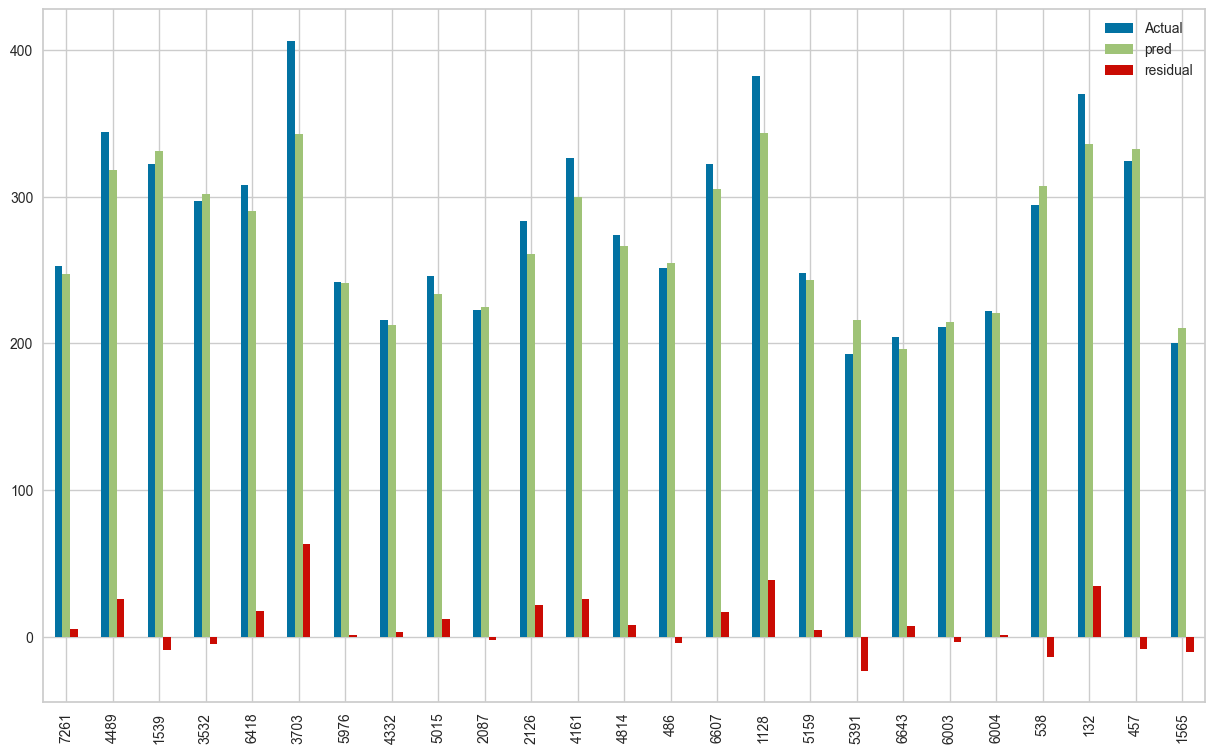

In [35]:
result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

In [36]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.8713608880187578

In [37]:
mae = mean_absolute_error(y_test, y_pred)
mae

13.51915444745604

In [38]:
mse = mean_squared_error(y_test, y_pred)
mse

442.4706161519342

In [39]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

21.03498552773294

In [42]:
CO2_Emissions_mean = df["CO2 Emissions(g/km)"].mean()
CO2_Emissions_mean

250.58469871360867

In [43]:
mae / CO2_Emissions_mean

0.05395043878120818

In [44]:
rmse / CO2_Emissions_mean

0.08394361521560285

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations gözlem
    p = df.shape[1]-1 # number of independent variables feature
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [47]:
adj_r2(y_test, y_pred, df)

0.871291164922833

In [48]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [49]:
y_train_pred = model.predict(X_train)

In [50]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8742483641261991
MAE 		: 13.448848226089469
MSE 		: 429.8883831163643
RMSE 		: 20.733749856607325


In [51]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8713608880187578
MAE 		: 13.51915444745604
MSE 		: 442.4706161519342
RMSE 		: 21.03498552773294


In [52]:
residuals = y_test - y_pred 

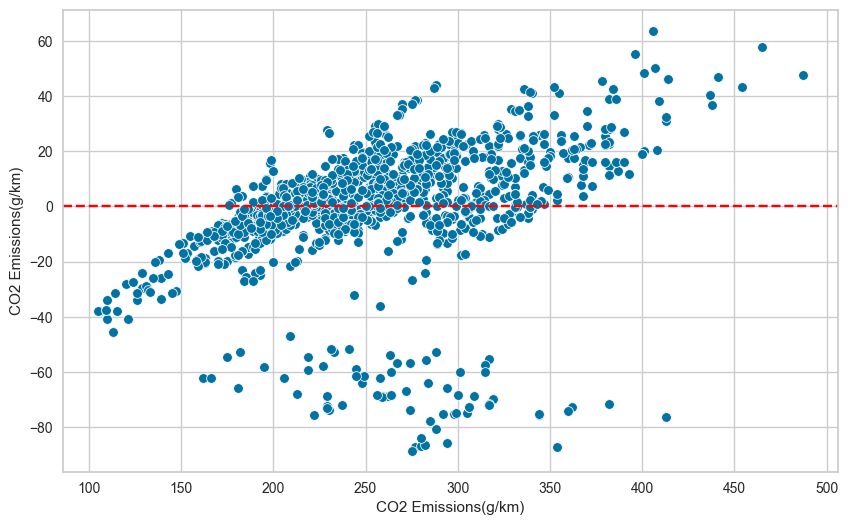

In [53]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y = 0, color = "red", linestyle = "--")
plt.show()

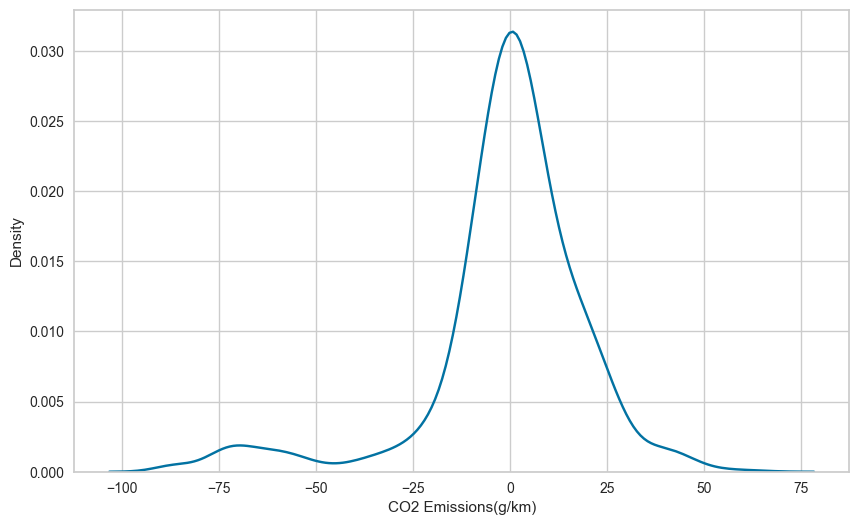

In [54]:
sns.kdeplot(residuals);

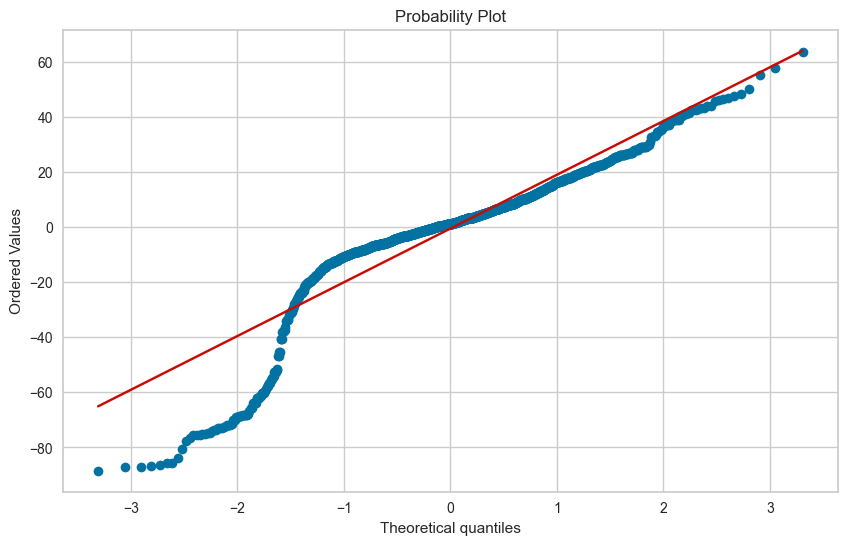

In [55]:
stats.probplot(residuals, dist = "norm", plot = plt);

In [56]:
skew(residuals)

-1.5167482617615078

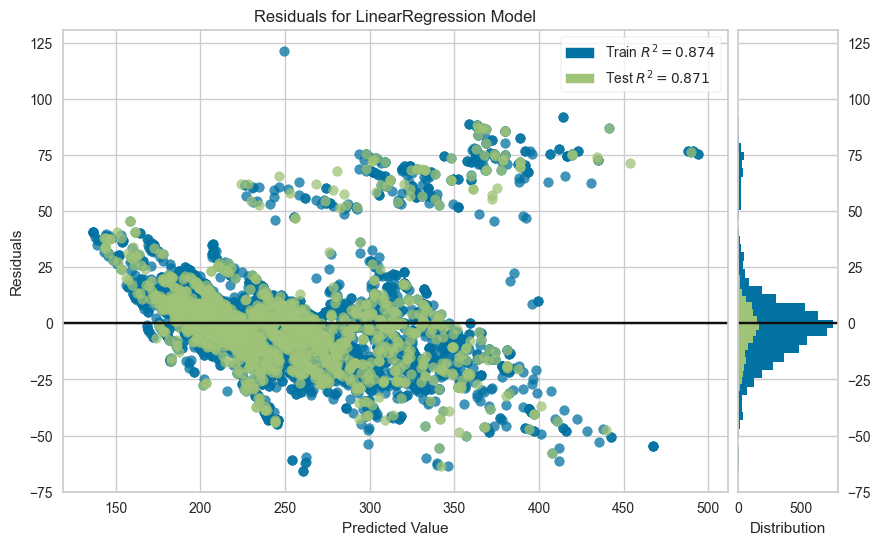

In [57]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show();   

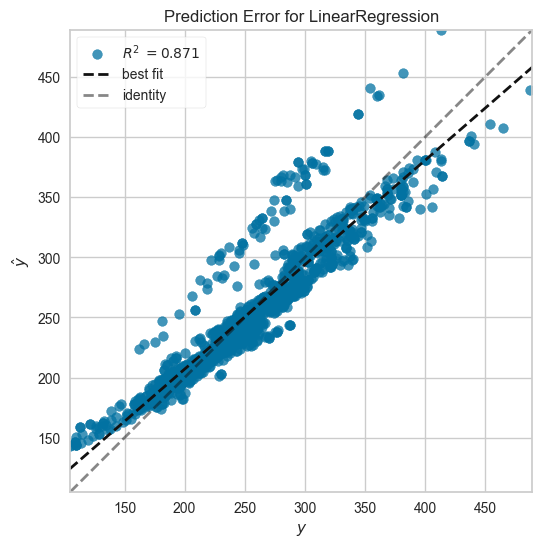

In [58]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show(); 

In [59]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [60]:
final_model.coef_

array([12.83782801,  2.97503146,  0.83187809,  9.4575278 ])

In [61]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )
coeff_df

Coefficient
Engine Size(L)                      12.837828
Fuel Consumption City (L/100 km)     2.975031
Fuel Consumption Hwy (L/100 km)      0.831878
Fuel Consumption Comb (L/100 km)     9.457528

In [63]:
final_model.intercept_

61.34157366916216

In [62]:
df.head()

Engine Size(L)  Fuel Consumption City (L/100 km)  \
0             2.0                               9.9   
1             2.4                              11.2   
2             1.5                               6.0   
3             3.5                              12.7   
4             3.5                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   CO2 Emissions(g/km)  
0                  196  
1                  221  
2                  136  
3                  255  
4                  244